### Linear Regression with one Feature From Scratch
Going to need a litle bit of knowledge about partial derivative and linear algebra

we need to find a line that has minimum error

y= mx+b , m= slope , b = y_intercept <br>
Mean Squared Error Function : Taking the difference from all the actual points and predicted values(using slope formulae) and divided by N (mean)<br>
$E = 1/n\sum \limits_{i=0} ^{h}(y_{i}-\hat{y_{i}})^{2}    $<br>
$\hat{y_{i}} = Predicted Value$ <br>
we can replace it with $\hat{y_{i}} = mx_{i}+b$
Then the equation becomes<br>
$E = 1/n\sum \limits_{i=0} ^{h}(y_{i}-(mx_{i}+b)) ^{2}   $ <br>

#### Now we need to apply Partial Derivative
<a href="https://byjus.com/maths/partial-derivative/">Check this byjus Tut</a><br>
We want to find a line(find m and b) which gives the lowest possible Error<br>
By taking the Partial derivative we find the steepest ascend(ie: error high) then we go to the opposite to find the minimum<br>
$ \frac{\partial E}{\partial m} =  1/n \sum \limits_{i=0}^{n}2(y_{i}-(m*x_{i}+b))(-x_{i}) $ <br>
$   =  -2/n \sum \limits_{i=0}^{n}{x_{i}}(y_{i}-(m*x_{i}+b))$<br>
$ \frac{\partial E}{\partial b} = -2/n \sum \limits_{i=0}^{n}(y_{i}-(m*x_{i}+b))$ <br>

If we want to imporve m and b <br>
For each iteration do the following <br>
The minus because we are going the opposite direction
$m = m -L\frac{\partial E}{\partial m}$ <br>
$b = b -L\frac{\partial E}{\partial b}$



## Python implementation

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
#read dataset
df = pd.read_csv("Datasets/salary_data.csv")
df.head(4)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525


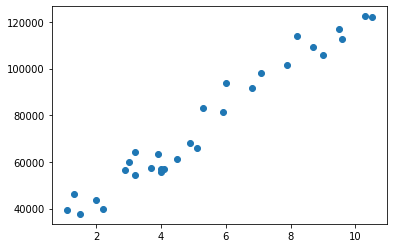

In [6]:
plt.scatter(df.iloc[:,:-1],df.iloc[:,-1])
plt.show()

In [10]:
#Not Going to use it 
def loss_function(m,b,points):
    """means_squared_error"""
    total_error =0 
    n = len(points)
    for i in range(len(points)):
        x = points.iloc[i,:0] #since only on feauture is there
        y = points.iloc[i,:-1]
        total_error += (y -(m*x+b)) ** 2
    total_error /= n
    return total_error

In [11]:
def gradient_descent(curr_m,curr_b,points,L):
    m_grad = 0
    b_grad = 0
    n=len(points)
    for i in range(n):
        x = points.iloc[i,0]
        y = points.iloc[i,-1]
        m_grad += -(2/n)*x*(y -(curr_m*x+curr_b))
        b_grad += -(2/n)*(y -(curr_m*x+curr_b))
    m = curr_m -m_grad*L
    b = curr_b -b_grad*L
    return m,b


In [28]:
def training(data,m,b,learning_rate,epochs):
    for i in tqdm(range(epochs)):
        m,b = gradient_descent(m,b,data,learning_rate)
    print(m,b)
    return m, b

In [29]:
m ,b=training(df,0,0,0.0001,100)

100%|██████████| 100/100 [00:00<00:00, 258.71it/s]

6770.751247220646 1107.7159999877676


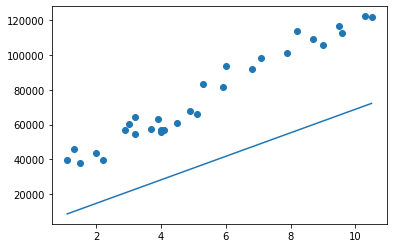

In [31]:
plt.scatter(df.iloc[:,:-1],df.iloc[:,-1])
plt.plot(df.iloc[:,:-1],list(map(lambda x : m * x + b, df.iloc[:,:-1].values)))
plt.show()